In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
# column stack example
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
# column stack of fish length and fish weight
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
# fish target data
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [8]:
# Splitting Data into Training and Test Sets
# stratify: take into account the % of each class existing in fish_target
train_input, test_input, train_target, test_target =\
    train_test_split(fish_data, fish_target, stratify=fish_target, random_state=1234)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [9]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

print('R Score (Train Set):', kn.score(train_input, train_target))
print('R Score (Test Set):', kn.score(test_input, test_target))

R Score (Train Set): 1.0
R Score (Test Set): 1.0


In [10]:
# A weird thing happens without regularization.
print(kn.predict([[25, 150]]))

[0.]


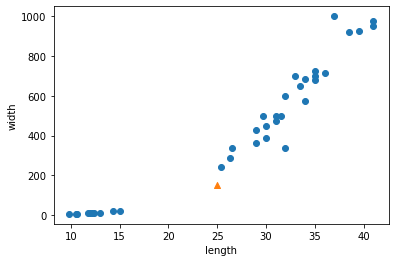

In [11]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')

plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [12]:
distances, indexes = kn.kneighbors([[25, 150]])

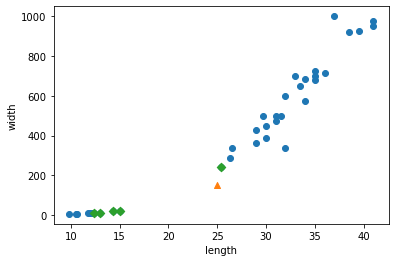

In [13]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')

plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [14]:
# Take "Scale" into account
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean.round(2), std.round(2))

[ 27.15 437.15] [  9.99 323.1 ]


In [15]:
train_input_scaled = (train_input - mean) / std

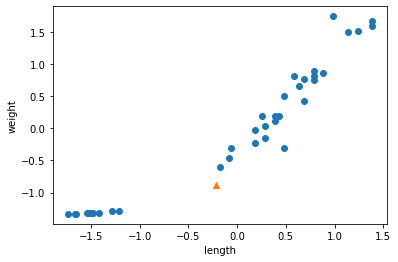

In [16]:
plt.scatter(train_input_scaled[:, 0], train_input_scaled[:, 1])
new = ([25, 150] - mean) / std

plt.scatter(new[0], new[1], marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
kn.fit(train_input_scaled, train_target)

test_input_scaled = (test_input - mean) / std
print(kn.score(test_input_scaled, test_target))

1.0


In [18]:
print(kn.predict([new]))

[1.]


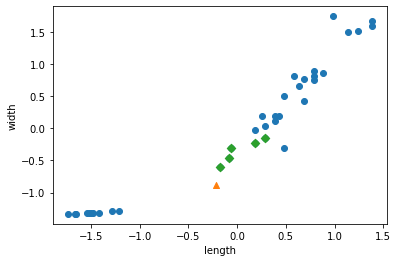

In [19]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_input_scaled[:, 0], train_input_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_input_scaled[indexes, 0], train_input_scaled[indexes, 1], marker='D')

plt.xlabel('length')
plt.ylabel('width')
plt.show()